In [1]:
from datasets import load_dataset

# Load the IMDB dataset
dataset = load_dataset("imdb")

# Convert to pandas DataFrame for easier manipulation
import pandas as pd

train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

# Combine train and test data
df = pd.concat([train_df, test_df], ignore_index=True)

e:\Imdb\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import re

def clean_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Apply cleaning to the DataFrame
df['cleaned_review_text'] = df['text'].apply(clean_text)

label
0    25000
1    25000
Name: count, dtype: int64
label
0    1227.88956
1    1261.39924
Name: review_length, dtype: float64


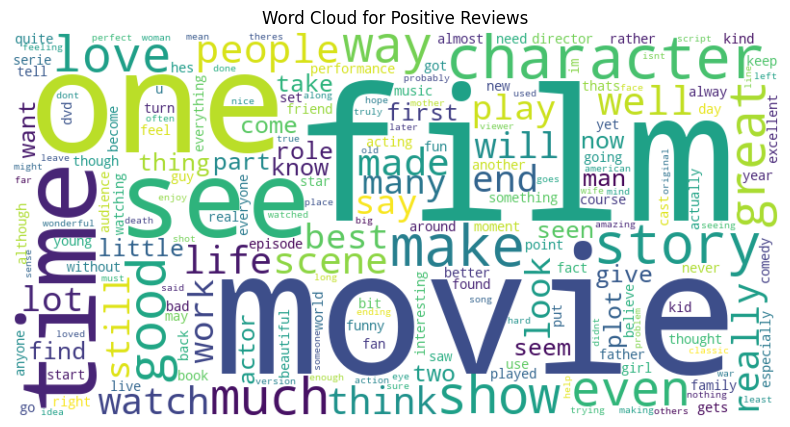

In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Number of reviews per sentiment
sentiment_counts = df['label'].value_counts()
print(sentiment_counts)

# Average review length for positive vs. negative
df['review_length'] = df['cleaned_review_text'].apply(len)
avg_length = df.groupby('label')['review_length'].mean()
print(avg_length)

# Word cloud for positive reviews
positive_reviews = df[df['label'] == 1]['cleaned_review_text']
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review_text'], df['label'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8905
Precision: 0.8805852115460656
Recall: 0.9007077856420627
F1 Score: 0.8905328401479556
